# Automatic differentiation

> Automatic differentiation (AD) is software to transform code
for one function into code for the derivative of the function.

### Example with autograd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
import autograd.numpy as np
from autograd import grad, elementwise_grad

In [4]:
def f(x):
    return 3 * x * x * x

In [5]:
f(10.0)

3000.0

In [6]:
fp = grad(f)


In [7]:
fp

<function autograd.wrap_util.unary_to_nary.<locals>.nary_operator.<locals>.nary_f>

In [8]:
fp(10.0)

900.0

In [9]:
X = np.linspace(-5, 5, 100)

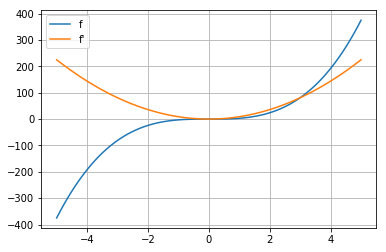

In [10]:
plt.plot(X, f(X), label="f")
plt.plot(X, [fp(x) for x in X], label="f'")
plt.legend()
plt.grid(True)

Autograd is a different library, but it's idea is similar.

> We (autograd) want to provide a third way: just write down the loss function using a standard numerical library like Numpy, and Autograd will give you its gradient.

[Under the hood](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md#whats-going-on-under-the-hood):

> To compute the gradient, Autograd first has to **record every transformation that was applied to the input** as it was turned into the output of your function. To do this, Autograd wraps functions (using the function primitive) so that when they're called, they add themselves to a list of operations performed. Autograd's core has a **table mapping** these wrapped primitives to their corresponding gradient functions.

# AD with PyTorch

In [11]:
import torch
from torch.autograd import Variable
from torchviz import make_dot

What is a variable?

![](http://pytorch.org/tutorials/_images/Variable.png)

Wraps a tensor and operations.

### Simple example

In [12]:
# Define variables
# Placeholder? Is the grad a fucntion?
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)


In [13]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3


In [14]:
y

Variable containing:
 5
[torch.FloatTensor of size 1]

In [15]:
y.grad_fn

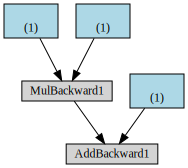

In [16]:
make_dot(y)

In [17]:
# Compute gradients.
y.backward()

In [18]:
# Print out the gradients. y = w * x + b    # y = 2 * x + 3

print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 


Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



$
\frac{\partial y}{\partial x} = w\\
\frac{\partial y}{\partial w} = x\\
\frac{\partial y}{\partial b} = 1\\
$

With x, w, b = [1, 2, 3] the gradients are: 2, 1, 1.

In [ ]:
[x.grad.data, w.grad.data, b.grad.data]

Interpretation:
* If we increase x by 1, our output will increase by 2.
* If we increase w by 1, our output will increase by 1.
* If we increase b by 1, our output will increate by 1.

### Five node example


In [ ]:
x = Variable(torch.ones(2, 2), requires_grad=True)

In [ ]:
x

In [ ]:
y = x + 2

In [ ]:
y

y is the result of an operation, it has a `grad_fn`

In [ ]:
y.grad_fn # references a Function that has created the Variable

In [ ]:
# More operations ....

In [ ]:
z = y * y * 3

In [ ]:
z

In [ ]:
z.grad_fn

In [ ]:
# Not just arithmetic.

In [ ]:
out = z.mean()

In [ ]:
out

In [ ]:
# Run backpropagation.

In [ ]:
out.backward() # out.backward(torch.Tensor([1.0])) # with respect to some scalar value.

In [ ]:
print(x.grad)

> When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

In [ ]:
make_dot(out)

In [ ]:
x.grad